In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

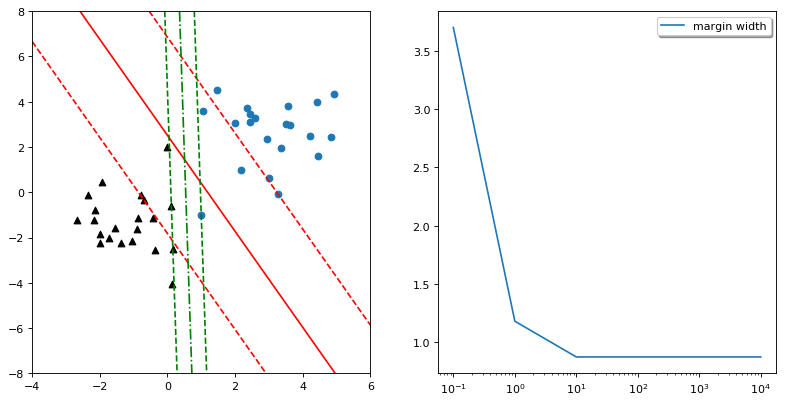

In [29]:
def generateData(n):
    """
    生成模型所需数据
    """
    np.random.seed(2046)
    X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
    Y = [[0]] * n + [[1]] * n
    data = np.concatenate((Y, X), axis=1)
    data = pd.DataFrame(data, columns=["y", "x1", "x2"])
    hardMargin = [[0, 0, 2], [1, 1, -1]]
    hardMargin = pd.DataFrame(hardMargin, columns=["y", "x1", "x2"])
    data = data.append(hardMargin)
    return data

def hardSoftMargin(data):
    """
    从小到大，用不同的损失系数训练模型
    """
    C = []
    res = []
    for i in range(-1, 5):
        C_ = 10 ** i
        model = SVC(C=C_, kernel="linear")
        model.fit(data[["x1", "x2"]], data["y"])
        res.append(model)
        C.append(C_)
    visualize(data, C, res)


def visualize(data, C, res):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(12, 6), dpi=80)
    # 在图形框里画两幅图
    ax = fig.add_subplot(1, 2, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    x1 = np.linspace(-4, 6, 100)
    x2 = np.linspace(-8, 8, 100)
    X1, X2 = np.meshgrid(x1, x2)
    # Soft margin
    soft = res[0].decision_function(np.c_[X1.ravel(), X2.ravel()])
    soft = soft.reshape(X1.shape)
    CS = ax.contour(X1, X2, soft, levels=[-1, 0, 1], colors=["r", "r", "r"],
        linestyles=["--", "-", "--"])
    # Hard margin
    hard = res[-1].decision_function(np.c_[X1.ravel(), X2.ravel()])
    hard = hard.reshape(X1.shape)
    ax.contour(X1, X2, hard, levels=[-1, 0, 1], colors=["g", "g", "g"],
        linestyles=["--", "-.", "--"])
    ax1 = fig.add_subplot(1, 2, 2)
    # Python2和Python3的map并不兼容，所以使用list(map)
    coef = list(map(lambda x: x.coef_, res))
    margin = list(map(lambda x: 2.0 / np.sqrt(x.dot(x.T)).item(), coef))
    ax1.plot(C, margin, label="margin width")
    ax1.set_xscale('log')
    legend = plt.legend(shadow=True, loc="best")
    plt.show()
    
data = generateData(20)
hardSoftMargin(data)

# 带箭头的注释

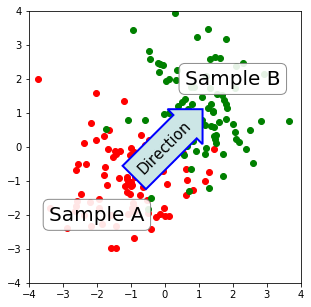

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect(1)
 
x1 = -1 + np.random.randn(100)
y1 = -1 + np.random.randn(100)
x2 = 1. + np.random.randn(100)
y2 = 1. + np.random.randn(100)
 
ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")
 
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
    bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
    bbox=bbox_props)
 

bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
      size=15,
      bbox=bbox_props)
 
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)
 
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
 
plt.show()